# Importing library 

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
import datetime as dt
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_auto.csv')

In [3]:
df.keys()

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [4]:
df.head(6)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
5,7,1,2946.0,0,34.0,1,12.0,"$125,301",Yes,$0,...,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban


In [5]:
df.describe(include='all')

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
count,8161.000000,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716,8161,7697,...,8161,8161.000000,8161,8161,8161,8161.000000,8161,8161.000000,7651.000000,8161
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6612,2,5106,...,2789,NaN,6,2,2857,NaN,2,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0,No,$0,...,"$1,500",NaN,z_SUV,no,$0,NaN,No,NaN,NaN,Highly Urban/ Urban
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615,7084,2294,...,157,NaN,2294,5783,5009,NaN,7161,NaN,NaN,6492
mean,5151.867663,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,NaN,NaN,NaN,...,NaN,5.351305,NaN,NaN,NaN,0.798554,NaN,1.695503,8.328323,NaN
std,2978.893962,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,NaN,NaN,NaN,...,NaN,4.146635,NaN,NaN,NaN,1.158453,NaN,2.147112,5.700742,NaN
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,-3.000000,NaN
25%,2559.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN
50%,5133.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,NaN,NaN,NaN,...,NaN,4.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,8.000000,NaN
75%,7745.000000,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,NaN,NaN,NaN,...,NaN,7.000000,NaN,NaN,NaN,2.000000,NaN,3.000000,12.000000,NaN


Now we have to handle some numerical data like Income, Home_val, Bluebook, Oldclaim.

In [6]:
df['INCOME'] = df['INCOME'].str.replace('$','').str.replace(',','').astype(np.float64)
df['HOME_VAL'] = df['HOME_VAL'].str.replace('$','').str.replace(',','').astype(np.float64)
df['BLUEBOOK'] = df['BLUEBOOK'].str.replace('$','').str.replace(',','').astype(np.float64)
df['OLDCLAIM'] = df['OLDCLAIM'].str.replace('$','').str.replace(',','').astype(np.float64)
df['EDUCATION'] = df['EDUCATION'].str.replace('<','')

In [7]:
df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,...,14230.0,11,Minivan,yes,4461.0,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,...,14940.0,1,Minivan,yes,0.0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,...,4010.0,4,z_SUV,no,38690.0,2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,306251.0,...,15440.0,7,Minivan,yes,0.0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,114986.0,No,243925.0,...,18000.0,1,z_SUV,no,19217.0,2,Yes,3,17.0,Highly Urban/ Urban


Now we drop some columns that are not use in our models and check the features that contain NaN value.

In [8]:
df = df.drop(columns=['INDEX','TARGET_AMT'])

In [9]:
df.isnull().any()

TARGET_FLAG    False
KIDSDRIV       False
AGE             True
HOMEKIDS       False
YOJ             True
INCOME          True
PARENT1        False
HOME_VAL        True
MSTATUS        False
SEX            False
EDUCATION      False
JOB             True
TRAVTIME       False
CAR_USE        False
BLUEBOOK       False
TIF            False
CAR_TYPE       False
RED_CAR        False
OLDCLAIM       False
CLM_FREQ       False
REVOKED        False
MVR_PTS        False
CAR_AGE         True
URBANICITY     False
dtype: bool

In [10]:
df.isnull().sum()

TARGET_FLAG      0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

As there are many missing values in our variable so I decided to handle with thess missing values.
For numerical variables I use two methods, relacing by mean value and median. 
For categorical variables I use the mode of categorical, it mean use the most commom category.

# Replacing categorical variables

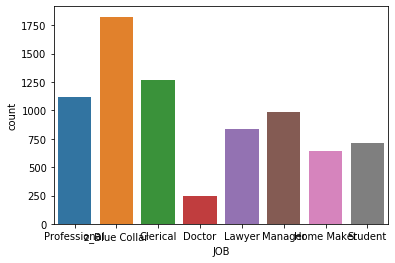

In [11]:
sns.countplot(df['JOB'],label="Sum")

In [12]:
df['JOB'].fillna('z_Blue Collar', inplace=True)

# Replacing numerical variable

## By Mean Value

In [13]:
df_mean = df.copy()
mean_YOJ = df['YOJ'].mean()
df_mean['YOJ'].fillna(mean_YOJ, inplace=True)
mean_INCOME = df['INCOME'].mean()
df_mean['INCOME'].fillna(mean_INCOME, inplace=True)
mean_HOME_VAL = df['HOME_VAL'].mean()
df_mean['HOME_VAL'].fillna(mean_HOME_VAL, inplace=True)
mean_CAR_AGE = df['CAR_AGE'].mean()
df_mean['CAR_AGE'].fillna(mean_CAR_AGE, inplace=True)
mean_AGE = df['AGE'].mean()
df_mean['AGE'].fillna(mean_AGE, inplace=True)

In [14]:
df_mean.isnull().sum()

TARGET_FLAG    0
KIDSDRIV       0
AGE            0
HOMEKIDS       0
YOJ            0
INCOME         0
PARENT1        0
HOME_VAL       0
MSTATUS        0
SEX            0
EDUCATION      0
JOB            0
TRAVTIME       0
CAR_USE        0
BLUEBOOK       0
TIF            0
CAR_TYPE       0
RED_CAR        0
OLDCLAIM       0
CLM_FREQ       0
REVOKED        0
MVR_PTS        0
CAR_AGE        0
URBANICITY     0
dtype: int64

we divide the date into numerical features and categorical features. And then we scale the numerical features before train models.

In [15]:
cnt_featname = ['KIDSDRIV','AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 
                'TRAVTIME','BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 
                'MVR_PTS', 'CAR_AGE' ]

In [16]:
continue_features = df_mean[cnt_featname]
categorical_features = df_mean.drop(cnt_featname, axis=1)

In [17]:
continue_features.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
0,0,60.0,0,11.000000,67349.000000,0.0,14,14230.0,11,4461.0,2,3,18.0
1,0,43.0,0,11.000000,91449.000000,257252.0,22,14940.0,1,0.0,0,0,1.0
2,0,35.0,1,10.000000,16039.000000,124191.0,5,4010.0,4,38690.0,2,3,10.0
3,0,51.0,0,14.000000,61898.094609,306251.0,32,15440.0,7,0.0,0,0,6.0
4,0,50.0,0,10.499286,114986.000000,243925.0,36,18000.0,1,19217.0,2,3,17.0


In [18]:
categorical_features.head()

,TARGET_FLAG,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
0,0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,Highly Urban/ Urban
1,0,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban
2,0,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban
3,0,No,Yes,M,High School,z_Blue Collar,Private,Minivan,yes,No,Highly Urban/ Urban
4,0,No,Yes,z_F,PhD,Doctor,Private,z_SUV,no,Yes,Highly Urban/ Urban


In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(continue_features)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
scaler.data_min_

array([ 0.0e+00,  1.6e+01,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
        5.0e+00,  1.5e+03,  1.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
       -3.0e+00])

In [21]:
scaler.data_max_

array([4.00000e+00, 8.10000e+01, 5.00000e+00, 2.30000e+01, 3.67030e+05,
       8.85282e+05, 1.42000e+02, 6.97400e+04, 2.50000e+01, 5.70370e+04,
       5.00000e+00, 1.30000e+01, 2.80000e+01])

In [22]:
continue_features = scaler.transform(continue_features)
continue_features

array([[0.        , 0.67692308, 0.        , ..., 0.4       , 0.23076923,
        0.67741935],
       [0.        , 0.41538462, 0.        , ..., 0.        , 0.        ,
        0.12903226],
       [0.        , 0.29230769, 0.2       , ..., 0.4       , 0.23076923,
        0.41935484],
       ...,
       [0.        , 0.46153846, 0.        , ..., 0.        , 0.        ,
        0.12903226],
       [0.        , 0.52307692, 0.        , ..., 0.        , 0.        ,
        0.4516129 ],
       [0.        , 0.55384615, 0.        , ..., 0.        , 0.        ,
        0.38709677]])

In [23]:
continue_features = pd.DataFrame(continue_features, columns=cnt_featname)
continue_features.describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000
mean,0.042764,0.442928,0.144247,0.456491,0.168646,0.174936,0.207925,0.208234,0.181304,0.070780,0.159711,0.130423,0.365430
std,0.127884,0.132683,0.223265,0.172913,0.126031,0.141649,0.116119,0.123384,0.172776,0.153885,0.231691,0.165162,0.178055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.353846,0.000000,0.391304,0.080939,0.000000,0.124088,0.114009,0.000000,0.000000,0.000000,0.000000,0.225806
50%,0.000000,0.446154,0.000000,0.478261,0.156355,0.174936,0.204380,0.189625,0.125000,0.000000,0.000000,0.076923,0.365430
75%,0.000000,0.538462,0.200000,0.565217,0.226968,0.263591,0.284672,0.283558,0.250000,0.081281,0.400000,0.230769,0.483871
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_mean = pd.concat((categorical_features, continue_features), axis=1)
df_mean.head()

,TARGET_FLAG,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,...,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
0,0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,...,0.478261,0.183497,0.000000,0.065693,0.186547,0.416667,0.078212,0.4,0.230769,0.677419
1,0,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,...,0.478261,0.249159,0.290588,0.124088,0.196952,0.000000,0.000000,0.0,0.000000,0.129032
2,0,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,No,...,0.434783,0.043699,0.140284,0.000000,0.036782,0.125000,0.678332,0.4,0.230769,0.419355
3,0,No,Yes,M,High School,z_Blue Collar,Private,Minivan,yes,No,...,0.608696,0.168646,0.345936,0.197080,0.204279,0.250000,0.000000,0.0,0.000000,0.290323
4,0,No,Yes,z_F,PhD,Doctor,Private,z_SUV,no,Yes,...,0.456491,0.313288,0.275534,0.226277,0.241794,0.000000,0.336922,0.4,0.230769,0.645161


## By Median

In [25]:
df_median = df.copy()
median_YOJ = df['YOJ'].median()
df_median['YOJ'].fillna(median_YOJ, inplace=True)
median_INCOME = df['INCOME'].median()
df_median['INCOME'].fillna(median_INCOME, inplace=True)
median_HOME_VAL = df['HOME_VAL'].median()
df_median['HOME_VAL'].fillna(median_HOME_VAL, inplace=True)
median_CAR_AGE = df['CAR_AGE'].median()
df_median['CAR_AGE'].fillna(median_CAR_AGE, inplace=True)
median_AGE = df['AGE'].median()
df_median['AGE'].fillna(median_AGE, inplace=True)

In [26]:
df_median.isnull().sum()

TARGET_FLAG    0
KIDSDRIV       0
AGE            0
HOMEKIDS       0
YOJ            0
INCOME         0
PARENT1        0
HOME_VAL       0
MSTATUS        0
SEX            0
EDUCATION      0
JOB            0
TRAVTIME       0
CAR_USE        0
BLUEBOOK       0
TIF            0
CAR_TYPE       0
RED_CAR        0
OLDCLAIM       0
CLM_FREQ       0
REVOKED        0
MVR_PTS        0
CAR_AGE        0
URBANICITY     0
dtype: int64

In [27]:
continue_features = df_median[cnt_featname]
categorical_features = df_median.drop(cnt_featname, axis=1)
scaler = MinMaxScaler()
scaler.fit(continue_features)
continue_features = scaler.transform(continue_features)
continue_features = pd.DataFrame(continue_features, columns=cnt_featname)
df_median = pd.concat((categorical_features, continue_features), axis=1)

From now we have 2 samples of data so we will perform our analys on these data compare them.

# Model

We will perform 10 model, Logistic regression, K-Nearest Neighbors classifier, Decision Tree classifier, Random Forest, Support vector machine, XGBoost, Linear Discriminant Analysis, Quadratic Discriminant Analysis, Naive Bayes and Neural Network. 

We train these models we will do hyperparameters turning to obtain the best parameters in order to get higher accuracy.

We start by the data that we rempleced NaN value by mean value and then median value.

## Case Mean

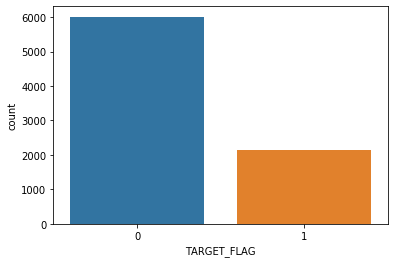

In [28]:
sns.countplot(df_mean['TARGET_FLAG'],label="Sum")

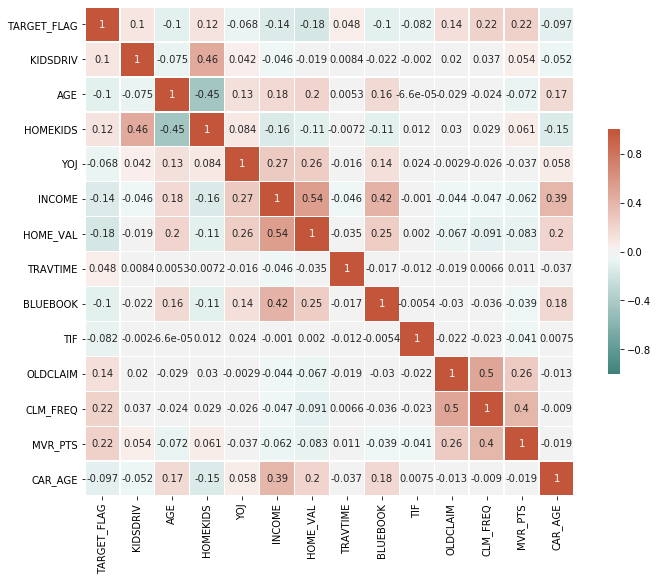

In [29]:
#correlation matrix
corrmat = df_mean.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, square=True)
cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(corrmat, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Now we have to convert catagorical feature into 0-1 data for "Parent1", "Mstatus", "sex", "Car_use", "Red_car", "Revoked" and "Urbanicity". 

In [30]:
data = df_mean.replace({"PARENT1" : {"Yes" : 1, "No":0},
                  "MSTATUS" : {"Yes" : 1, "z_No" : 0},
                  "SEX" : {"M" : 1, "z_F" : 0},
                  "CAR_USE" : {"Private" : 1, "Commercial" : 0},
                  "RED_CAR" : {"yes" : 1, "no" : 0},
                  "REVOKED" : {"Yes" : 1, "No":0},
                  "URBANICITY" : {"Highly Urban/ Urban":1, "z_Highly Rural/ Rural":0}})

For the rest of categorical data we transform to dummies.

In [31]:
df_mean = pd.get_dummies(data)
df_mean.isnull().any()

TARGET_FLAG                False
PARENT1                    False
MSTATUS                    False
SEX                        False
CAR_USE                    False
RED_CAR                    False
REVOKED                    False
URBANICITY                 False
KIDSDRIV                   False
AGE                        False
HOMEKIDS                   False
YOJ                        False
INCOME                     False
HOME_VAL                   False
TRAVTIME                   False
BLUEBOOK                   False
TIF                        False
OLDCLAIM                   False
CLM_FREQ                   False
MVR_PTS                    False
CAR_AGE                    False
EDUCATION_Bachelors        False
EDUCATION_High School      False
EDUCATION_Masters          False
EDUCATION_PhD              False
EDUCATION_z_High School    False
JOB_Clerical               False
JOB_Doctor                 False
JOB_Home Maker             False
JOB_Lawyer                 False
JOB_Manage

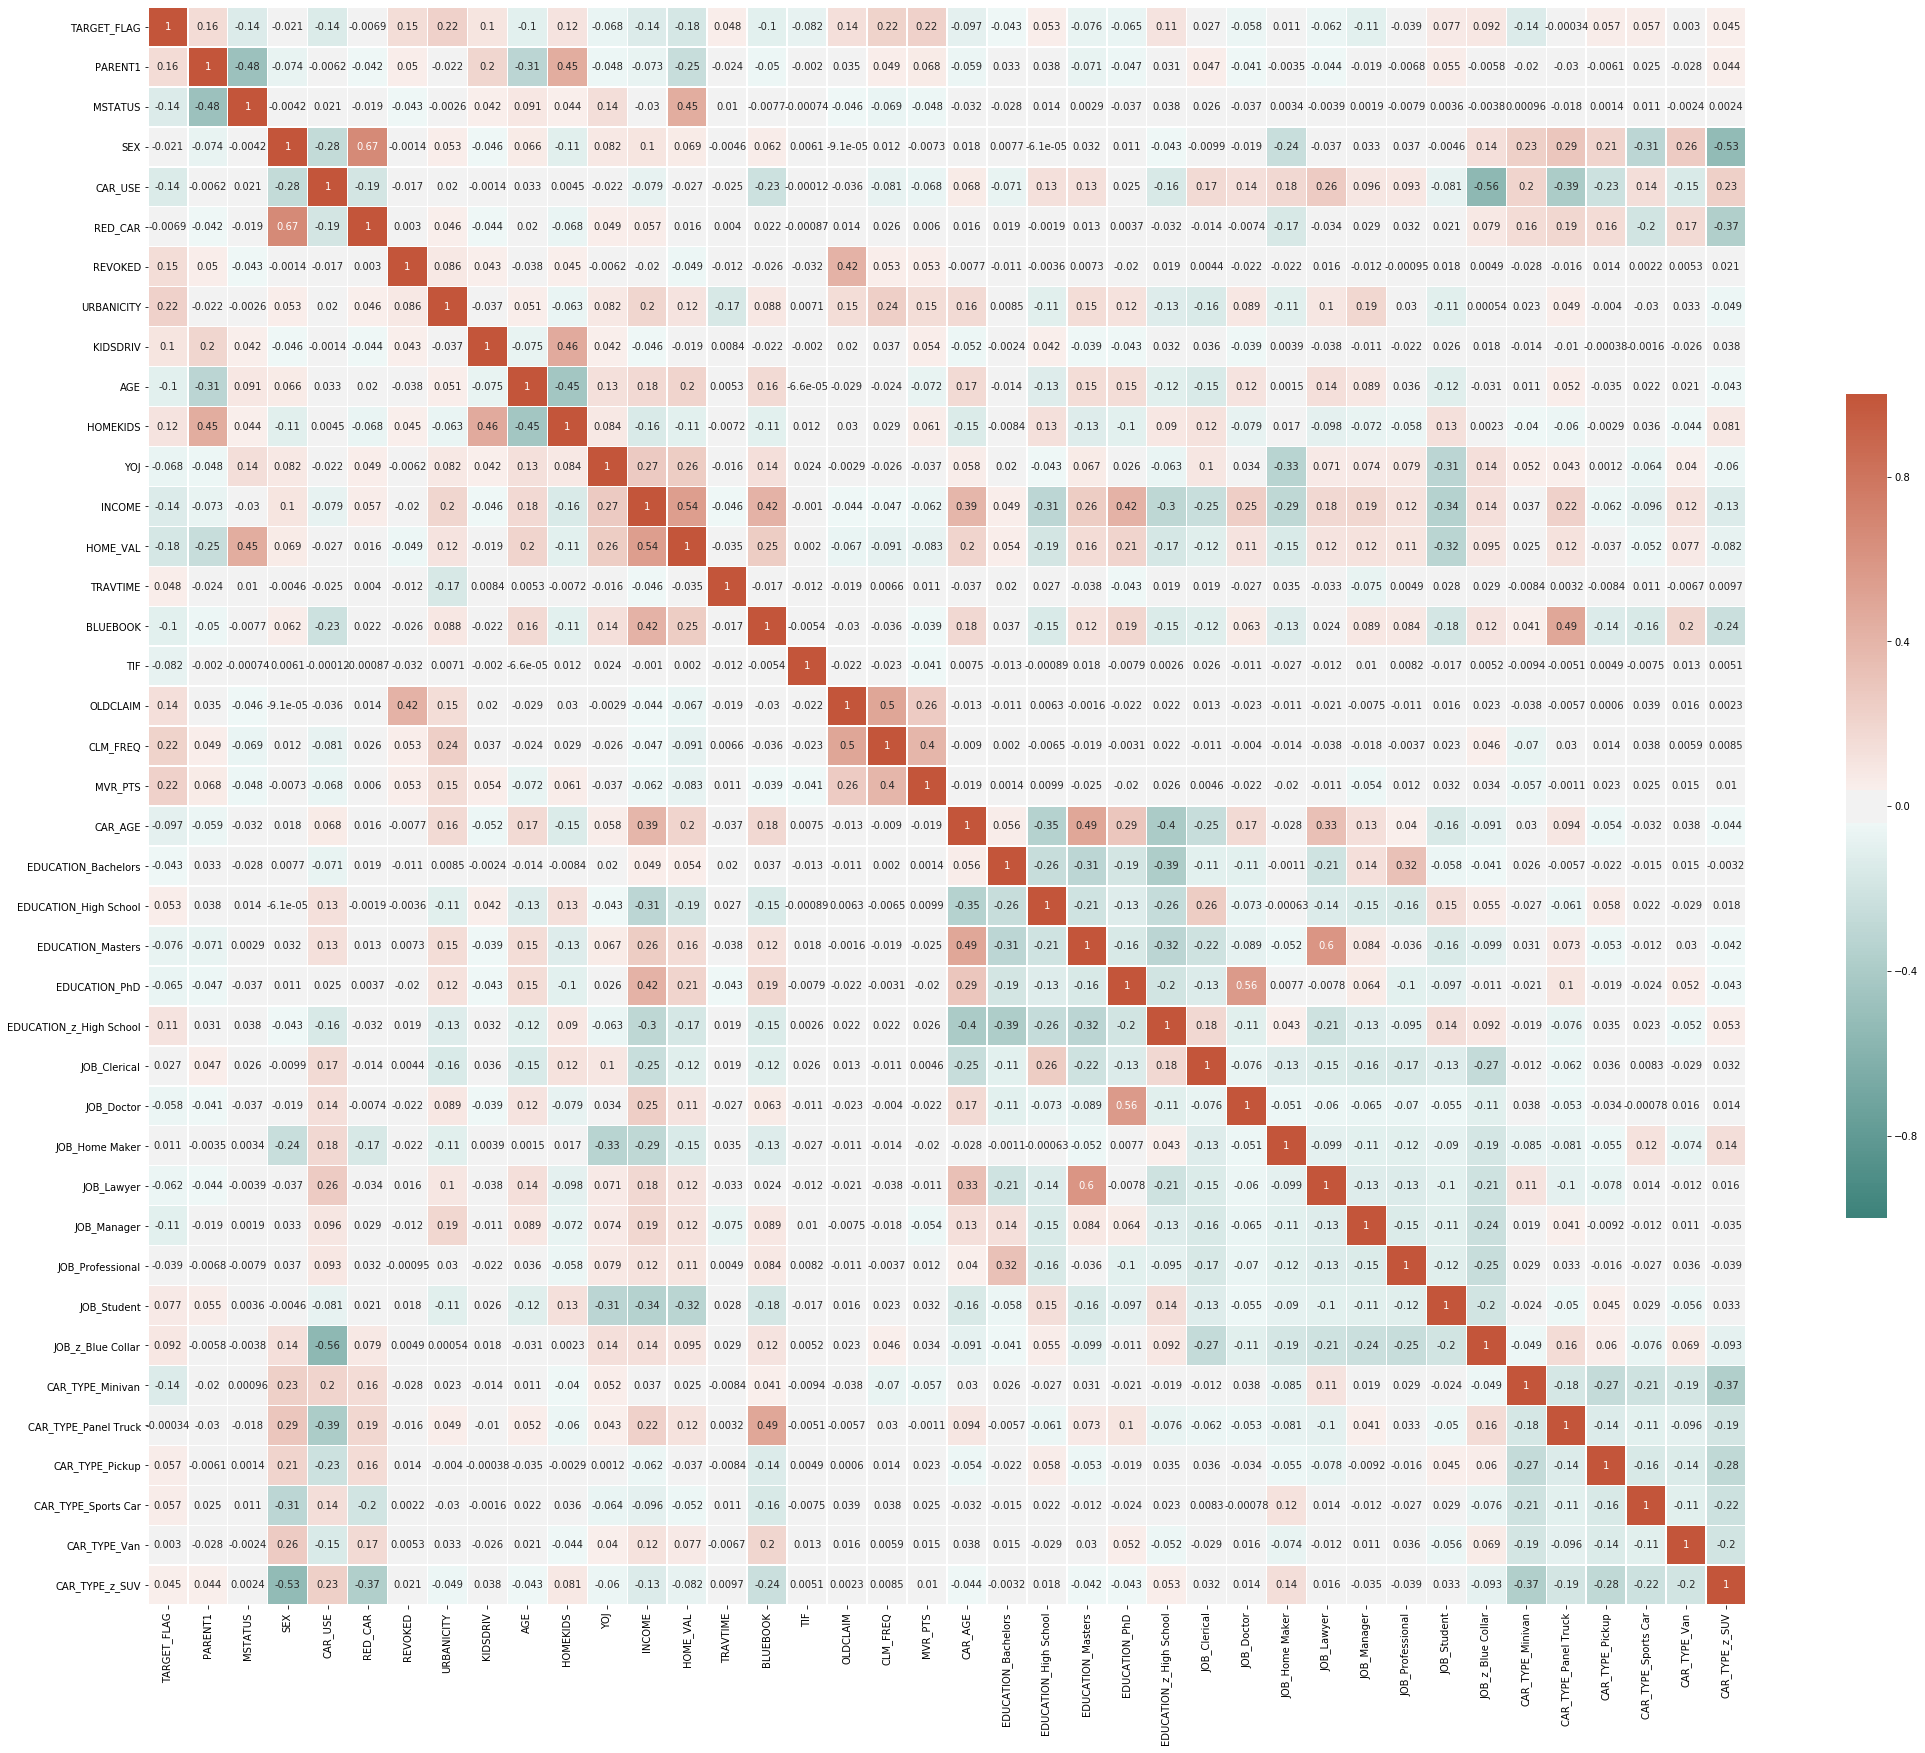

In [32]:
#correlation matrix again
corrmat = df_mean.corr()
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(corrmat, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [33]:
df_train = df_mean.drop(columns='TARGET_FLAG')
y = df_mean.TARGET_FLAG

In [34]:
X_train = df_train.copy()
y_train = y

We initial all models before do hyperparameter turning.

In [35]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 40)
rf = RandomForestClassifier(random_state = 40, n_estimators = 100)
svc = SVC(gamma = 'auto')
xgb = XGBClassifier(n_job = -1, random_state =40)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
nbg = GaussianNB()
mlp = MLPClassifier(max_iter=200, random_state=40)

In [36]:
# 1. For logistic regression
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 2, 4, 8 ,10)}

# 2. For KNN
knn_params = {'n_neighbors':[4,5,6,7,8,9,10],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'p':[1,2]}

# 3. For DT
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[46]}
# 4. For RF
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[ 10, 30, 200, 400],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[46]}
# 5. For SVC
svc_params = {'C': [0.1, 1, 10,100], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': [ 1, 0.1, 0.001, 0.0001]}

#6. For XGB
xgb_params = xgb_params_grid = {'min_child_weight': [1, 5],
                   'gamma': [0.04, 0, 0.1, 1.5],
                   'subsample': [0.6, 0.8, 1.0],
                   'colsample_bytree': [0.46, 1.0],
                   'max_depth': [3, 7]}

#7. For neural network
mlp_params = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e3],
            'hidden_layer_sizes': [(50,50,50), (100, 100, 100), (100,)],
            'activation': ['tanh', 'relu'],
            'learning_rate': ['constant','adaptive']}



In [37]:
def tune_hyperparameters(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score #if you want to know best parametes and best score
    
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, param_grid, verbose = 3, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

In [38]:
# Tune LR hyperparameters.
tune_hyperparameters(lr, param_grid=lr_params)
lr_best_params, lr_best_score =  best_params, best_score
print('LR Best Score:', lr_best_score)
print('And Best Parameters:', lr_best_params)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   13.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Best Score: 79.05
And Best Parameters: {'C': 1.0, 'penalty': 'l1'}


In [39]:
# Tune KNN hyperparameters
tune_hyperparameters(knn, param_grid=knn_params)
knn_best_params, knn_best_score =  best_params, best_score
print('KNN Best Score:', knn_best_score)
print('And Best Parameters:', knn_best_params)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min


KNN Best Score: 76.79
And Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  2.2min finished


In [40]:
# Tune DT hyperparameters
tune_hyperparameters(dt, param_grid=dt_params)
dt_best_params, dt_best_score =  best_params, best_score
print('DT Best Score:', dt_best_score)
print('And Best Parameters:', dt_best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 462 candidates, totalling 4620 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:   41.0s


DT Best Score: 74.71
And Best Parameters: {'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 46}


[Parallel(n_jobs=-1)]: Done 4620 out of 4620 | elapsed:   45.4s finished


In [41]:
# Tune RF hyperparameters
tune_hyperparameters(rf, param_grid=rf_params)
rf_best_params, rf_best_score =  best_params, best_score
print('RF Best Score:', rf_best_score)
print("And Best Parameters:", rf_best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 18.3min finished


RF Best Score: 79.48
And Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 400, 'random_state': 46}


In [42]:
# Tune SVC hyperparameters
tune_hyperparameters(svc, param_grid=svc_params)
svc_best_params, svc_best_score =  best_params, best_score
print('SVC Best Score:', svc_best_score)
print('And Best Parameters:', svc_best_params)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 15.0min finished


SVC Best Score: 78.8
And Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [43]:
# Tune XGB hyperparameters
tune_hyperparameters(xgb, param_grid=xgb_params)
xgb_best_params, xgb_best_score =  best_params, best_score
print('XGB Best Score:',xgb_best_score)
print('And Best Parameters:',xgb_best_params)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  4.6min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_job } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Best Score: 79.52
And Best Parameters: {'colsample_bytree': 0.46, 'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8}


In [44]:
# Turn MLP hyperparameter 
tune_hyperparameters(mlp, param_grid=mlp_params)
mlp_best_params, mlp_best_score =  best_params, best_score
print('MLP Best Score:',mlp_best_score)
print('And Best Parameters:',mlp_best_params)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 31.9min finished


MLP Best Score: 79.13
And Best Parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}


After run hyperparameter, according to the best score, we see that Random Forest and XGBoost models are the performce better compare to another models. Next we will refil all models with best parameters and do the cross validation to validate the models.

In [45]:
models = {}
models['Logistic Regression'] = LogisticRegression(**lr_best_params)
models['Decision Tree'] = DecisionTreeClassifier(**dt_best_params)
models['Support Vector Machine'] = SVC(**svc_best_params)
models['Linear Discriminant Analysis'] = LinearDiscriminantAnalysis()
models['Quadratic Discriminant Analysis'] = QuadraticDiscriminantAnalysis()
models['Random Forest'] = RandomForestClassifier(**rf_best_params)
models['K-Nearest Neighbors'] = KNeighborsClassifier(**knn_best_params)
models['Gaussian Naive Bayes'] = GaussianNB()
models['XGBoost'] = XGBClassifier(**xgb_best_params)
models['Neural Network'] = MLPClassifier(**mlp_best_params)

In [46]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision_macro': make_scorer(precision_score), 
           'recall_macro' : make_scorer(recall_score), 
           'f1_weighted' : make_scorer(f1_score), 
           'roc_auc' : make_scorer(roc_auc_score)}
def crossvalidate_model(model, X, y, scoring = scoring, cv = 20):
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=20)
    sorted(scores.keys())
    metrics = ["accuracy", "precision", "recall", "F1", "roc"]
    values = [scores['test_accuracy'].mean(), scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean(), scores['test_f1_weighted'].mean(),scores['test_roc_auc'].mean()]    
    return pd.DataFrame(data={'metric': metrics, 'value': values})

In [47]:
def test_model(predictions, actual):
    accuracy = accuracy_score(actual, predictions)
    precision = precision_score(actual, predictions)
    recall = recall_score(actual, predictions)
    f1 = f1_score(actual, predictions)
    metrics = ["accuracy", "precision", "recall", "F1"]
    values = [accuracy, precision, recall, f1]    
    return pd.DataFrame(data={'metric': metrics, 'value': values})

In [49]:
cross_validation_results =  pd.DataFrame({'Metric' : ['Accuracy', 'Precision', 'Recall', 'F1_score']})
test_results = pd.DataFrame({'Metric' : ['Accuracy', 'Precision', 'Recall', 'F1_score']})
fit_model = {}
for key in models.keys():
    model = models[key]
    model.fit(X_train, y_train)
    fit_model[key] = model
#     predictions = model.predict(X_test)
    cross_validation_results[key] = crossvalidate_model(model, X_train, y_train).value
#     test_results[key] = test_model(predictions, y_test).value


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-

[13:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
cross_validation_results

,Metric,Logistic Regression,Decision Tree,Support Vector Machine,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Random Forest,K-Nearest Neighbors,Gaussian Naive Bayes,XGBoost,Neural Network
0,Accuracy,0.789727,0.746352,0.787405,0.788382,0.686194,0.792305,0.766339,0.728959,0.792302,0.789121
1,Precision,0.663104,0.527379,0.700254,0.658483,0.440621,0.703969,0.612005,0.490972,0.652348,0.659339
2,Recall,0.414248,0.384121,0.340879,0.413348,0.633398,0.370591,0.315416,0.657200,0.457425,0.419864
3,F1_score,0.508480,0.443868,0.456698,0.506485,0.515551,0.483837,0.415275,0.561382,0.536743,0.510288


This result show that Random Forest and XGBoost have higher accuracy rate compare to another models. If we look at the precision metric we see that Random Forest is quite better. 

We will do another data, case Median, and compare with the prevoius one.

## Case Median

In [51]:
data = df_median.replace({"PARENT1" : {"Yes" : 1, "No":0},
                  "MSTATUS" : {"Yes" : 1, "z_No" : 0},
                  "SEX" : {"M" : 1, "z_F" : 0},
                  "CAR_USE" : {"Private" : 1, "Commercial" : 0},
                  "RED_CAR" : {"yes" : 1, "no" : 0},
                  "REVOKED" : {"Yes" : 1, "No":0},
                  "URBANICITY" : {"Highly Urban/ Urban":1, "z_Highly Rural/ Rural":0}})

In [52]:
df_median = pd.get_dummies(data)
df_median.isnull().any()

TARGET_FLAG                False
PARENT1                    False
MSTATUS                    False
SEX                        False
CAR_USE                    False
RED_CAR                    False
REVOKED                    False
URBANICITY                 False
KIDSDRIV                   False
AGE                        False
HOMEKIDS                   False
YOJ                        False
INCOME                     False
HOME_VAL                   False
TRAVTIME                   False
BLUEBOOK                   False
TIF                        False
OLDCLAIM                   False
CLM_FREQ                   False
MVR_PTS                    False
CAR_AGE                    False
EDUCATION_Bachelors        False
EDUCATION_High School      False
EDUCATION_Masters          False
EDUCATION_PhD              False
EDUCATION_z_High School    False
JOB_Clerical               False
JOB_Doctor                 False
JOB_Home Maker             False
JOB_Lawyer                 False
JOB_Manage

In [53]:
df_train = df_median.drop(columns='TARGET_FLAG')
y = df_median.TARGET_FLAG

In [54]:
# X_train, X_test, y_train, y_test = train_test_split(df_train,y,test_size=0.34)

In [55]:
X_train = df_train.copy()
y_train = y

In [56]:
# Tune LR hyperparameters.
tune_hyperparameters(lr, param_grid=lr_params)
lr_best_params, lr_best_score =  best_params, best_score
print('LR Best Score:', lr_best_score)
print('And Best Parameters:', lr_best_params)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Best Score: 79.07
And Best Parameters: {'C': 1.0, 'penalty': 'l1'}


In [57]:
# Tune KNN hyperparameters
tune_hyperparameters(knn, param_grid=knn_params)
knn_best_params, knn_best_score =  best_params, best_score
print('KNN Best Score:', knn_best_score)
print('And Best Parameters:', knn_best_params)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min


KNN Best Score: 76.76
And Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  2.1min finished


In [58]:
# Tune DT hyperparameters
tune_hyperparameters(dt, param_grid=dt_params)
dt_best_params, dt_best_score =  best_params, best_score
print('DT Best Score:', dt_best_score)
print('And Best Parameters:', dt_best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 462 candidates, totalling 4620 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1116 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 2268 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 3676 tasks      | elapsed:   22.4s


DT Best Score: 75.08
And Best Parameters: {'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 2, 'random_state': 46}


[Parallel(n_jobs=-1)]: Done 4620 out of 4620 | elapsed:   27.4s finished


In [59]:
# Tune RF hyperparameters
tune_hyperparameters(rf, param_grid=rf_params)
rf_best_params, rf_best_score =  best_params, best_score
print('RF Best Score:', rf_best_score)
print("And Best Parameters:", rf_best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 19.9min finished


RF Best Score: 79.38
And Best Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200, 'random_state': 46}


In [60]:
# Tune SVC hyperparameters
tune_hyperparameters(svc, param_grid=svc_params)
svc_best_params, svc_best_score =  best_params, best_score
print('SVC Best Score:', svc_best_score)
print('And Best Parameters:', svc_best_params)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 19.5min finished


SVC Best Score: 78.81
And Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [61]:
# Tune XGB hyperparameters
tune_hyperparameters(xgb, param_grid=xgb_params)
xgb_best_params, xgb_best_score =  best_params, best_score
print('XGB Best Score:',xgb_best_score)
print('And Best Parameters:',xgb_best_params)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  5.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_job } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Best Score: 79.67
And Best Parameters: {'colsample_bytree': 0.46, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0}


In [62]:
# Turn MLP hyperparameter 
tune_hyperparameters(mlp, param_grid=mlp_params)
mlp_best_params, mlp_best_score =  best_params, best_score
print('MLP Best Score:',mlp_best_score)
print('And Best Parameters:',mlp_best_params)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 38.5min finished


MLP Best Score: 79.07
And Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [63]:
models2 = {}
models2['Logistic Regression'] = LogisticRegression(**lr_best_params)
models2['Decision Tree'] = DecisionTreeClassifier(**dt_best_params)
models2['Support Vector Machine'] = SVC(**svc_best_params)
models2['Linear Discriminant Analysis'] = LinearDiscriminantAnalysis()
models2['Quadratic Discriminant Analysis'] = QuadraticDiscriminantAnalysis()
models2['Random Forest'] = RandomForestClassifier(**rf_best_params)
models2['K-Nearest Neighbors'] = KNeighborsClassifier(**knn_best_params)
models2['Gaussian Naive Bayes'] = GaussianNB()
models2['XGBoost'] = XGBClassifier(**xgb_best_params)
models2['Neural Network'] = MLPClassifier(**mlp_best_params)

In [64]:
cross_validation_results2 =  pd.DataFrame({'Metric' : ['Accuracy', 'Precision', 'Recall', 'F1_score']})
test_results2 = pd.DataFrame({'Metric' : ['Accuracy', 'Precision', 'Recall', 'F1_score']})
fit_model2 = {}
for key in models2.keys():
    model = models2[key]
    model.fit(X_train, y_train)
    fit_model2[key] = model
#     predictions = model.predict(X_test)
    cross_validation_results2[key] = crossvalidate_model(model, X_train, y_train).value
#     test_results2[key] = test_model(predictions, y_test).value


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-

[15:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [65]:
cross_validation_results2

,Metric,Logistic Regression,Decision Tree,Support Vector Machine,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Random Forest,K-Nearest Neighbors,Gaussian Naive Bayes,XGBoost,Neural Network
0,Accuracy,0.789850,0.744136,0.786670,0.788381,0.687927,0.794879,0.765846,0.728960,0.795614,0.788749
1,Precision,0.663368,0.521398,0.697739,0.658661,0.442979,0.711654,0.609473,0.490972,0.665930,0.639988
2,Recall,0.414711,0.382165,0.338564,0.412881,0.641316,0.376636,0.314945,0.657204,0.456040,0.453764
3,F1_score,0.508945,0.439852,0.453930,0.506195,0.517958,0.491299,0.414289,0.561400,0.540151,0.528715


The result show that Random Forest and XGBoost are perform better than another models the same as models on data with mean value. 


If we compare these two cases we see that the accuracy in the case median is quit higher than the case mean. So we will choose the dataset with median value for the prediction. Final, we choose XGBoost algorithms as the final model.

## Final model XGBoost 

In [66]:
final_model = fit_model2['XGBoost']

In [67]:
test_data = pd.read_csv('test_auto.csv')

In [68]:
test_data.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [69]:
test_data = test_data.drop(columns=['INDEX','TARGET_AMT','TARGET_FLAG'])
test_data['INCOME'] = test_data['INCOME'].str.replace('$','').str.replace(',','').astype(np.float64)
test_data['HOME_VAL'] = test_data['HOME_VAL'].str.replace('$','').str.replace(',','').astype(np.float64)
test_data['BLUEBOOK'] = test_data['BLUEBOOK'].str.replace('$','').str.replace(',','').astype(np.float64)
test_data['OLDCLAIM'] = test_data['OLDCLAIM'].str.replace('$','').str.replace(',','').astype(np.float64)
test_data['EDUCATION'] = test_data['EDUCATION'].str.replace('<','') 

In [70]:
test_data['YOJ'].fillna(median_YOJ, inplace=True)
test_data['INCOME'].fillna(median_INCOME, inplace=True)
test_data['HOME_VAL'].fillna(median_HOME_VAL, inplace=True)
test_data['CAR_AGE'].fillna(median_CAR_AGE, inplace=True)
test_data['AGE'].fillna(median_AGE, inplace=True)
test_data['JOB'].fillna('z_Blue Collar', inplace=True)

In [71]:
continue_features = test_data[cnt_featname]
categorical_features = test_data.drop(cnt_featname, axis=1)
scaler = MinMaxScaler()
scaler.fit(continue_features)
continue_features = scaler.transform(continue_features)
continue_features = pd.DataFrame(continue_features, columns=cnt_featname)
test_data = pd.concat((categorical_features, continue_features), axis=1)

In [72]:
data = test_data.replace({"PARENT1" : {"Yes" : 1, "No":0},
                  "MSTATUS" : {"Yes" : 1, "z_No" : 0},
                  "SEX" : {"M" : 1, "z_F" : 0},
                  "CAR_USE" : {"Private" : 1, "Commercial" : 0},
                  "RED_CAR" : {"yes" : 1, "no" : 0},
                  "REVOKED" : {"Yes" : 1, "No":0},
                  "URBANICITY" : {"Highly Urban/ Urban":1, "z_Highly Rural/ Rural":0}})

In [73]:
test_data = pd.get_dummies(data)

In [74]:
predict_test = final_model.predict(test_data)

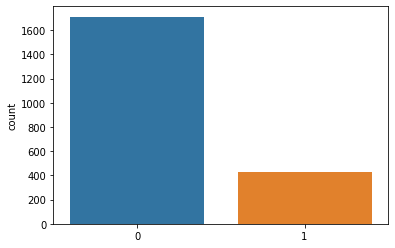

In [75]:
sns.countplot(predict_test,label="Sum")

In [76]:
predict_test = pd.DataFrame(predict_test,columns=["TARGET_FLAG_PREDICT"])

In [77]:
predict_test.to_csv('target_flag_predict.csv')